# Homework Assignment 1

## Data analysis

In this assignment, one must:

1. Describe your data and their features.

2. Perform an unconditional mono-variate analysis.

3. Perform a class-conditional mono-variate analysis.

4. Perform an unconditional bi-variate analysis of the predictors.

5. Perform an unconditional multi-variate analysis of the predictors.

## Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import numpy as np


In [2]:
pd.options.display.max_columns = None

sns.set_theme(style='darkgrid')
sns.set_palette("twilight_shifted")

## Reading Database

In [3]:
data = pd.read_csv("../../data/external/Agregado-20241114133303.csv", 
                   encoding="latin-1",
                   sep=";")

print(data.shape)
data.head()

(659, 229)


,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de Serviço,Natureza Jurídica,G05A - Quantidade total de municípios atendidos com abastecimento de água,G05B - Quantidade total de municípios atendidos com esgotamento sanitário,G06A - População urbana residente do(s) município(s) com abastecimento de água,G06B - População urbana residente do(s) município(s) com esgotamento sanitário,"G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE","G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE",GE001 - Quantidade de municípios atendidos com abastecimento de água com delegação em vigor,GE002 - Quantidade de municípios atendidos com abastecimento de água com delegação vencida,GE003 - Quantidade de municípios atendidos com abastecimento de água sem delegação,GE005 - Quantidade total de municípios atendidos,GE008 - Quantidade de Sedes municipais atendidas com abastecimento de água,GE009 - Quantidade de Sedes municipais atendidas com esgotamento sanitário,GE010 - Quantidade de Localidades (excluídas as sedes) atendidas com abastecimento de água,GE011 - Quantidade de Localidades (excluídas as sedes) atendidas com esgotamento sanitário,GE014 - Quantidade de municípios atendidos com esgotamento sanitário com delegação em vigor,GE015 - Quantidade de municípios atendidos com esgotamento sanitário com delegação vencida,GE016 - Quantidade de municípios atendidos com esgotamento sanitário sem delegação,GE017 - Ano de vencimento da delegação de abastecimento de água,GE018 - Ano de vencimento da delegação de esgotamento sanitário,"GE025 - Quantidade de municípios não atendidos com abastecimento de água, mas com delegação em vigor","GE026 - Quantidade de municípios não atendidos com abastecimento de água, mas com delegação vencida para prestar esses serviços","GE028 - Quantidade de municípios não atendidos com esgotamento sanitário, mas com delegação em vigor para prestar esses serviços","GE029 - Quantidade de municípios não atendidos com esgotamento sanitário, mas com delegação vencida para prestar esses serviços",AG001 - População total atendida com abastecimento de água,AG001A - População total atendida com abastecimento de água no ano anterior ao de referência.,AG002 - Quantidade de ligações ativas de água,AG002A - Quantidade de ligações ativas de água no ano anterior ao de referência.,AG003 - Quantidade de economias ativas de água,AG003A - Quantidade de economias ativas de água no ano anterior ao de referência.,AG004 - Quantidade de ligações ativas de água micromedidas,AG004A - Quantidade de ligações ativas de água micromedidas no ano anterior ao de referência.,AG005 - Extensão da rede de água,AG005A - Extensão da rede de água no ano anterior ao de referência.,AG006 - Volume de água produzido,AG007 - Volume de água tratada em ETAs,AG008 - Volume de água micromedido,AG010 - Volume de água consumido,AG011 - Volume de água faturado,AG012 - Volume de água macromedido,AG013 - Quantidade de economias residenciais ativas de água,AG013A - Quantidade de economias residenciais ativas de água no ano anterior ao de referência.,AG014 - Quantidade de economias ativas de água micromedidas,AG014A - Quantidade de economias ativas de água micromedidas no ano anterior ao de referência.,AG015 - Volume de água tratada por simples desinfecção,AG016 - Volume de água bruta importado,AG017 - Volume de água bruta exportado,AG018 - Volume de água tratada importado,AG019 - Volume de água tratada exportado,AG020 - Volume micromedido nas economias residenciais ativas de água,AG021 - Quantidade de ligações totais de água,AG021A - Quantidade de ligações totais de água no ano anterior ao de referência.,AG022 - Quantidade de economias residenciais ativas de água micromedidas,AG022A - Quantidade de economias residenciais ativas de água micromedidas no ano anterior ao de referência.,AG024 - Volume de serviço,AG025A - População

In [4]:
[c for c in data.columns if c.startswith("IN057")]

['IN057 - Índice de fluoretação de água']

In [5]:
# selected_cols = ["Município", "Ano de Referência", "Sigla do Prestador", 
#                  "Abrangência", "Tipo de Serviço", "Natureza Jurídica",
#                  "IN022 - Consumo médio percapita de água", "IN023 - Índice de atendimento urbano de água", 
#                  "IN055 - Índice de atendimento total de água", 
#                  "G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE"]

dim_municipio = data[["Código do Município", "Município"]].drop_duplicates()
dim_prestadores = data[["Código do Prestador", "Prestador", "Sigla do Prestador"]].drop_duplicates()

In [6]:
columns_new_names = {
    'Município': 'nm_municipio',
    # 'Ano de Referência': 'ano',
    # 'Sigla do Prestador': 'sg_prestador',
    'Abrangência': 'abrangencia',
    'Tipo de Serviço': 'tipo_servico',
    'Natureza Jurídica': 'nat_juridica',
    'IN001 - Densidade de economias de água por ligação': 'IN001',
    'IN009 - Índice de hidrometração': 'IN009',
    'IN020 - Extensão da rede de água por ligação': 'IN020',
    'IN022 - Consumo médio percapita de água': 'IN022',
    'IN023 - Índice de atendimento urbano de água': 'IN023',
    'IN037 - Participação da despesa com energia elétrica nas despesas de exploração': 'IN037',
    'IN038 - Participação da despesa com produtos químicos nas despesas de exploração (DEX)': 'IN038',
    'IN055 - Índice de atendimento total de água': 'IN055',
    'IN057 - Índice de fluoretação de água': 'IN057'
}

selected_cols = columns_new_names.keys()
numerical_columns = ['IN001', 'IN009', 'IN020', 'IN023', 'IN037', 'IN038', 'IN055', 'IN057']
categorical_columns = ['tipo_servico']
target_col = 'consumption_bands'

In [7]:
def get_consumption_bands(in022: float):
    if np.isnan(in022):
        return np.nan
    elif in022 <= 50:
        return "Critic low"
    elif in022 > 50 and in022 <= 100:
        return "Low"
    elif in022 > 100 and in022 <= 150:
        return "Moderate"
    elif in022 > 150 and in022 <= 200:
        return "Moderate to High"
    else:
        return "Very High"



In [8]:
columns_transformations = {
        # "ano": int,
        "IN001": lambda x: x.str.replace(",", ".").astype(float), 
        "IN009": lambda x: x.str.replace(",", ".").astype(float), 
        "IN020": lambda x: x.str.replace(",", ".").astype(float), 
        "IN022": lambda x: x.str.replace(",", ".").astype(float), 
        "IN023": lambda x: x.str.replace(",", ".").astype(float), 
        "IN037": lambda x: x.str.replace(",", ".").astype(float), 
        "IN038": lambda x: x.str.replace(",", ".").astype(float), 
        "IN055": lambda x: x.str.replace(",", ".").astype(float), 
        "IN057": lambda x: x.str.replace(",", ".").astype(float), 
        # "G12A": lambda x: x.str.replace(".", "").astype(float)
    }

In [9]:
df = (data[selected_cols]
      # .query("`Ano de Referência` != '---'")
      .rename(columns=columns_new_names))

df["tipo_servico"] = df["tipo_servico"].str.rstrip()
df[list(columns_transformations.keys())] = df.agg(columns_transformations)

df[target_col] = df["IN022"].apply(get_consumption_bands)

df = (df[df["consumption_bands"].notna()]
      .drop(columns=["IN022"]))
           


##  1 Describe your data and their features
1 Describe your data and their features in terms of number of observations $N$, number of predictor variables $D$, number of classes $L$ and class-distribution (that is, the number of observations for each of the classes).

In [10]:
# number of observations
n_observations = len(df)
print("Number of observations (N):", n_observations)

Number of observations (N): 511


In [11]:
n_variables = len(numerical_columns)
print("Number of predictor variables (D):", n_variables)

Number of predictor variables (D): 8


In [12]:
n_cat_var = len(categorical_columns)
print("Number of categorical variables (N_cat):", n_cat_var)

Number of categorical variables (N_cat): 1


In [13]:
n_classes = len(df[target_col].unique())
print("Number of classes (L):", n_classes)

Number of classes (L): 5


In [14]:
def describe_class(df: pd.DataFrame, col_name: str, col_description: str) -> None:
    L = len(df[col_name].unique())
    description_str = "\n".join(
        [
            f"\nThe column '{col_description}' has {L} categories",
            f"Observations per category:\n{df[col_name].value_counts()}"
        ])
    
    return description_str


In [15]:
# Class distribution

print("#"*80)
s = f" Class-distribution for the features "
print(f"{s:#^80}")
print("#"*80)

for desc, col_name in columns_new_names.items():
    if col_name in categorical_columns:
        print(describe_class(df, col_name, desc))

################################################################################
##################### Class-distribution for the features ######################
################################################################################

The column 'Tipo de Serviço' has 2 categories
Observations per category:
Água e Esgoto    300
Água             211
Name: tipo_servico, dtype: int64


In [16]:
print("#"*80)
s = f" Class-distribution for the Variable of interest | {target_col} "
print(f"{s:#^80}")
print("#"*80)
print(describe_class(df, target_col, 'Faixas de consumos de água por habitante - IN022'))

################################################################################
##### Class-distribution for the Variable of interest | consumption_bands ######
################################################################################

The column 'Faixas de consumos de água por habitante - IN022' has 5 categories
Observations per category:
Moderate            236
Low                 158
Very High            55
Moderate to High     51
Critic low           11
Name: consumption_bands, dtype: int64


## 2. Perform an unconditional mono-variate analysis.

Perform an unconditional mono-variate analysis of each of the $D$ predictors. Specifically, you must plot their (unconditional) histograms and box-plots, calculate their (unconditional) mean $\mu_d$, standard deviation $\sigma_d$ and skewness $\gamma_d$, with $d = 1,...,D$ using all the N observations.

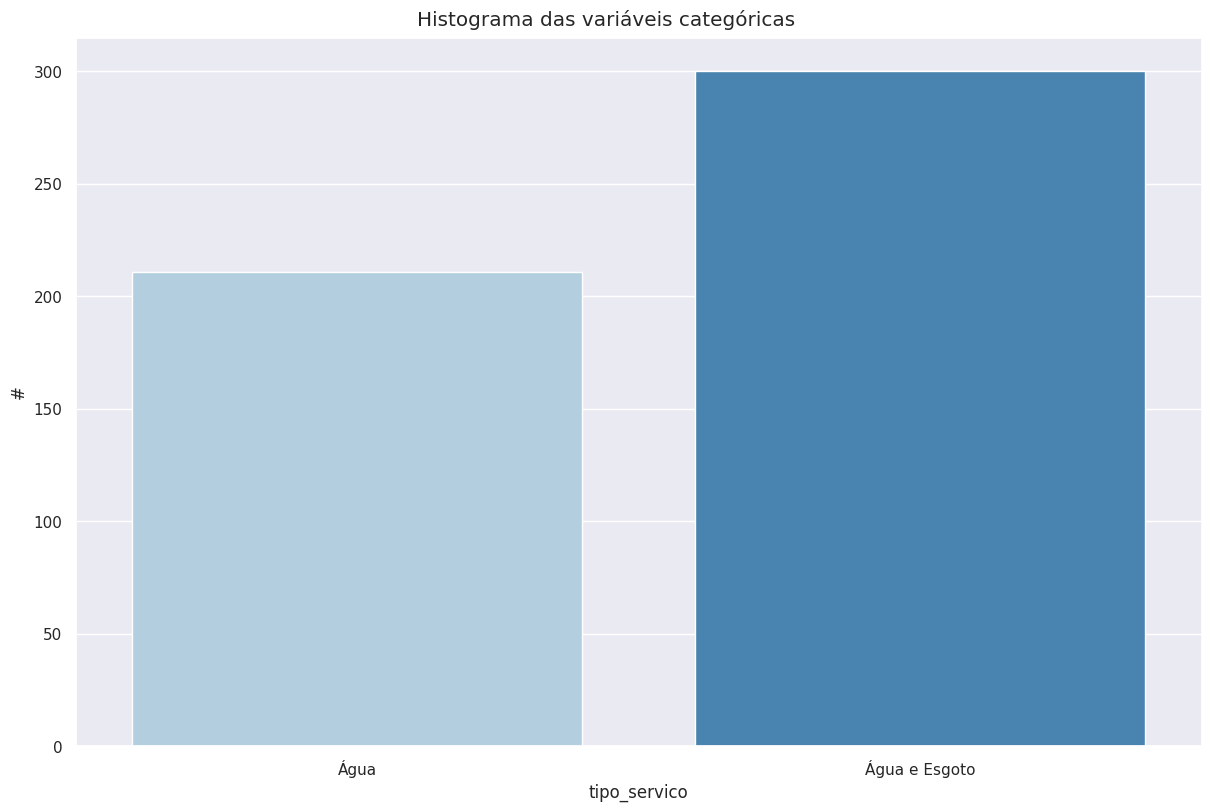

In [17]:

fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)
rotations = [0, 0, 10]
has = ['center']
for ax, col, rotation, ha in zip([axs], categorical_columns, rotations, has):
    sns.countplot(df, x=col, ax=ax, palette="Blues")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha=ha)
    ax.set_ylabel("#")

plt.suptitle("Histograma das variáveis categóricas")
plt = plt

In [18]:
numerical_columns

['IN001', 'IN009', 'IN020', 'IN023', 'IN037', 'IN038', 'IN055', 'IN057']

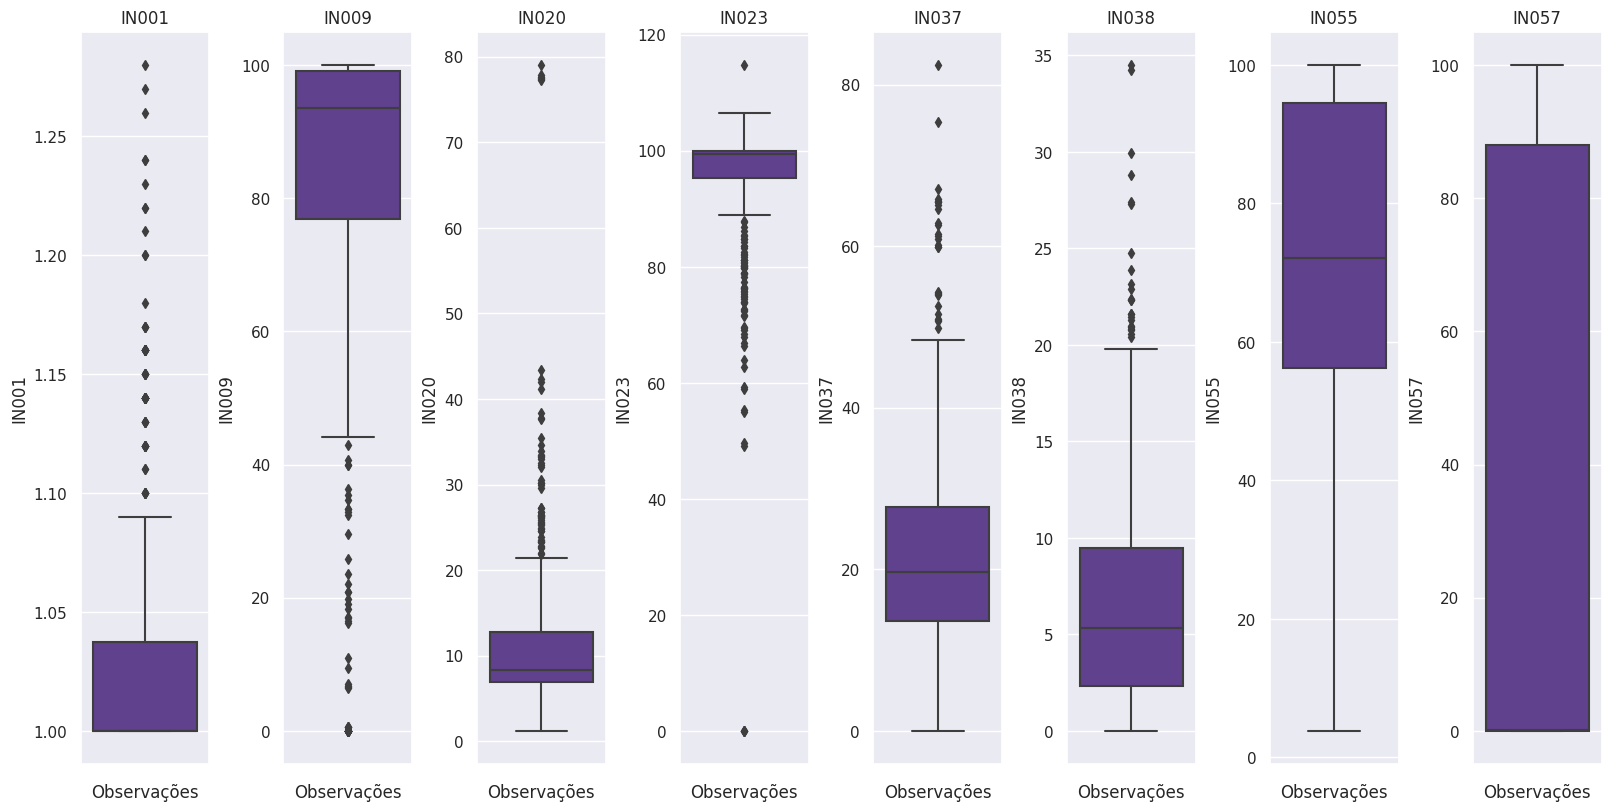

In [19]:
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(16,8), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
# plt.suptitle("Histograma das variáveis numéricas")
for ax, col in zip(axs.flatten(), numerical_columns):
    sns.boxplot(
        y=df[col],
        ax=ax
    )

    ax.set(title=f"{col}")
    ax.set_xlabel("Observações", fontsize=12)
    ax.set_ylabel(col, fontsize=12)


In [20]:
df.describe().loc[["count", "mean", "std"]]

,IN001,IN009,IN020,IN023,IN037,IN038,IN055,IN057
count,506.000000,511.000000,507.000000,468.000000,509.000000,509.000000,490.000000,472.000000
mean,1.030237,81.215303,12.052130,94.516303,22.153792,6.752417,72.607163,39.776441
std,0.054587,27.201552,10.267019,12.595402,13.276675,5.870020,21.802571,43.057553


$$\gamma_d = \frac{\sum_{i=1}^N (X_i - \overline{X})^3}{(N-1)* \sigma^3}$$

In [21]:
def skewness(df, col):
    N = len(df[col].dropna())
    x_hat = df[col].dropna().mean()
    std = df[col].dropna().std()

    skew = df[col].apply(lambda x: (x-x_hat)**3).sum()/((N-1)*std**3)

    return skew

def skew(X):
    _X = X[~np.isnan(X)]
    N = len(_X)
    x_hat = np.mean(_X)
    std = np.std(_X)

    skew = np.sum(np.fromiter(((x-x_hat)**3 for x in _X), float))/((N-1)*std**3)

    return skew   

In [22]:
s_size = 20
for col in numerical_columns:
    _str = f"{col}: {skew(df[col]):.6f}"
    print(_str)


IN001: 2.069405
IN009: -1.827884
IN020: 3.713756
IN023: -4.434904
IN037: 1.348394
IN038: 1.551765
IN055: -0.407945
IN057: 0.292423


In [23]:
# Pandas built-in method
df.skew(numeric_only=True)

IN001    2.071461
IN009   -1.829683
IN020    3.717438
IN023   -4.439670
IN037    1.349726
IN038    1.553298
IN055   -0.408364
IN057    0.292735
dtype: float64

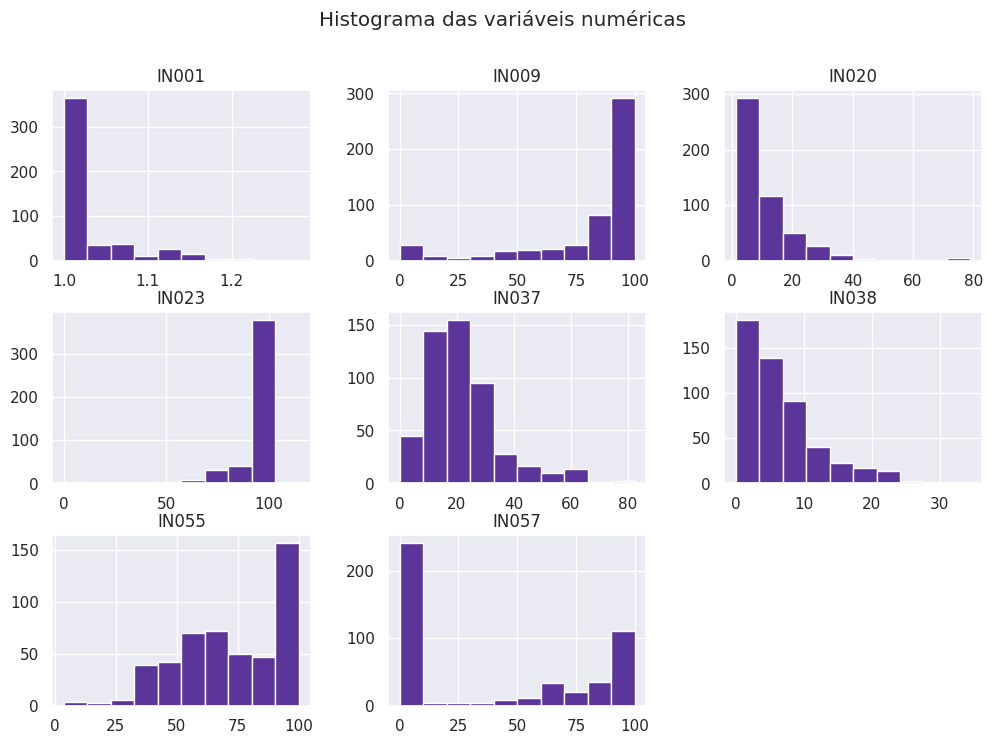

In [24]:
df.hist(figsize=(12,8))
plt.suptitle("Histograma das variáveis numéricas")
plt = plt

In [25]:
# # Visualizing the histogram of column G12A with higher definition
# df[["G12A"]].hist(figsize=(12,8))
# plt.suptitle("População total residente do(s) município(s) com abastecimento de água, segundo o IBGE")

# plt = plt

## 3. Perform a class-conditional mono-variate analysis.
Perform a class-conditional mono-variate analysis of each of the predictors. Again, you must plot their (class-conditional) histograms and box-plots, calculate their (class-conditional) mean $\mu_{d|l}$, standard deviation $\sigma_{d|l}$ and skewness $\gamma_{d|l}$ , with $d = 1,..., D$, now using only the $N_l$ observations of class $l$, for each the $L$ classes.

In [26]:
def class_conditional_analysis(df: pd.DataFrame, col_name: str, category: str) -> None:
    _df = df.query(f"{col_name} == '{category}'")

    print("#"*80)
    s = f" Conditional mono-variate analysis | {col_name} = {category} "
    print(f"{s:#^80}")
    print("#"*80, "\n")
    description = _df.describe().loc[["count", "mean", "std"]]
    s = " Descriptive Statistic "
    print(f"{s:#^80}")
    print(description, "\n")
    
    skew = _df.skew(numeric_only=True)
    s = " Skewnes "
    print(f"{s:#^80}")
    print(skew, "\n")


    _df.hist(figsize=(12,8))
    plt.suptitle(f"Class-conditional histogram | {col_name} = {category}")



In [27]:

df.dropna().groupby("consumption_bands").agg({
    "IN001": ("count", np.mean, np.std, skew),
    "IN009": ("count", np.mean, np.std, skew),
    "IN020": ("count", np.mean, np.std, skew),
    "IN023": ("count", np.mean, np.std, skew),
    "IN037": ("count", np.mean, np.std, skew),
    "IN038": ("count", np.mean, np.std, skew),
    "IN055": ("count", np.mean, np.std, skew),
    "IN057": ("count", np.mean, np.std, skew)
    })

IN001                               IN009             \
                  count      mean       std      skew count       mean   
consumption_bands                                                        
Critic low            8  1.001250  0.003536  2.591756     8  86.900000   
Low                 128  1.028906  0.063149  2.450812   128  78.147422   
Moderate            192  1.030781  0.051398  1.678907   192  87.991771   
Moderate to High     46  1.037391  0.055315  1.449072    46  74.845000   
Very High            48  1.030208  0.036407  1.115798    48  62.445625   

                                       IN020                                  \
                         std      skew count       mean        std      skew   
consumption_bands                                                              
Critic low         25.566764 -2.286216     8  13.376250   4.069113 -0.804826   
Low                26.114932 -1.701943   128  10.839922   6.170525  1.187638   
Moderate           20.610504 -2.563644   192  12.443542  11.980086  3.762824   
Moderate to High   32.463356 -1.164125    46   8.248696   2.751181  2.944659   
Very High          42.599817 -0.572231    48  11.466875   6.592190  1.041740   

                  IN023                                 IN037             \
                  count       mean        std      skew count       mean   
consumption_bands                                                          
Critic low            8  80.812500  16.244002 -0.277416     8  16.451250   
Low                 128  96.027344  11.308134 -5.725238   128  22.175937   
Moderate            192  93.663073  13.603679 -4.175716   192  21.334479   
Moderate to High     46  96.204783   8.749984 -3.333937    46  22.936522   
Very High            48  95.462917  15.063451 -5.657858    48  24.398958   

                                       IN038                                \
                         std      skew count      mean       std      skew   
consumption_bands                                                            
Critic low         10.032753  0.978683     8  3.558750  3.034480  0.336877   
Low                15.767306  1.520805   128  8.004141  5.988316  0.829019   
Moderate           10.403742  1.398204   192  6.342604  4.782666  1.393969   
Moderate to High   11.026385  1.216730    46  6.428478  5.883457  1.616272   
Very High          16.624741  0.635744    48  5.024583  6.454703  1.808994   

                  IN055                                 IN057             \
                  count       mean        std      skew count       mean   
consumption_bands                                                          
Critic low            8  59.606250  15.502698  1.245548     8  58.533750   
Low                 128  71.028203  18.736316  0.030311   128  37.514063   
Moderate            192  74.099740  21.375536 -0.331905   192  45.975729   
Moderate to High     46  78.758478  18.100062 -0.509493    46  48.302826   
Very High            48  75.986250  25.860112 -0.484378    48  28.371667   

                                        
                         std      skew  
consumption_bands                       
Critic low         36.787078 -1.180379  
Low                43.397441  0.429125  
Moderate           43.311133  0.000885  
Moderate to High   43.972904 -0.087450  
Very High          41.330585  0.906498

In [28]:
bands = ['Critic low', 'Low', 'Moderate', 'Moderate to High', 'Very High']

In [29]:

def cat_class_conditional_plot(df, categorical_columns, col, category, plot_params=None):
    fig, axs = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)
    
    _df = df.query(f"{col}=='{category}'")
    
    if plot_params == None:
        rotations = [0] * len(categorical_columns)
        has = ["center"] * len(categorical_columns)
    else:
        rotations = plot_params["rotations"]
        has = plot_params["has"]

    for ax, _col, rotation, ha in zip([axs], categorical_columns, rotations, has):
        sns.countplot(_df, x=col, ax=ax, palette="Blues")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha=ha)
        ax.set_ylabel("#")

    plt.suptitle(f"Análise mono-variada condicional | consumption_bands  = {category}")
    fig = fig

In [30]:

def tipo_servico_conditional_plot(df, col, bands, colors):
    fig, axs = plt.subplots(2, 3, figsize=(12,8), dpi=100, constrained_layout = True)
    
    for category, ax in zip(bands, axs.flatten()):
        _df = df.query(f"{col}=='{category}'")
    
        sns.countplot(_df, x="tipo_servico", ax=ax, palette=colors)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha=ha)
        ax.set_ylabel("Nº de Observações")
        ax.set_xlabel("Tipo de Serviço")
        ax.set_title(f"{category}")
    plt.suptitle(f"Análise mono-variada condicional por faixa de consumo")
    fig = fig

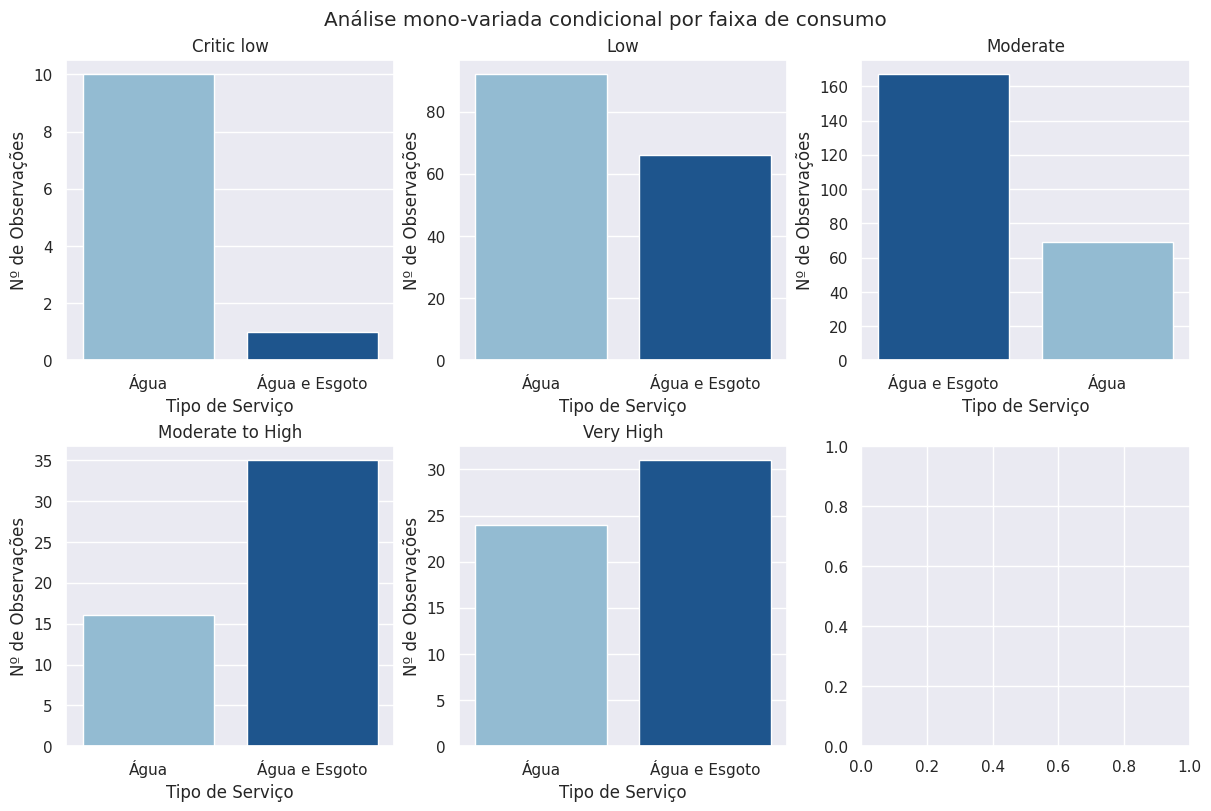

In [31]:
colors = {'Água': (0.5356862745098039, 0.746082276047674, 0.8642522106881968), 
          'Água e Esgoto': (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)}

col = "consumption_bands"
# category = bands[0]


tipo_servico_conditional_plot(df, col, bands, colors)

################################################################################
###### Conditional mono-variate analysis | consumption_bands = Critic low ######
################################################################################ 

############################ Descriptive Statistic #############################
           IN001      IN009      IN020      IN023      IN037      IN038  \
count  11.000000  11.000000  11.000000  10.000000  10.000000  10.000000   
mean    1.020909  83.647273  14.975455  81.958000  23.056000   5.191000   
std     0.066099  24.297830   8.402004  15.464063  16.647797   5.374879   

           IN055      IN057  
count  10.000000   9.000000  
mean   56.764000  52.030000  
std    18.912775  39.557766   

################################### Skewnes ####################################
IN001    3.304412
IN009   -1.649590
IN020    2.165807
IN023   -0.357042
IN037    0.897933
IN038    1.791566
IN055   -0.066108
IN057   -0.754233
dtype: float64 

#########

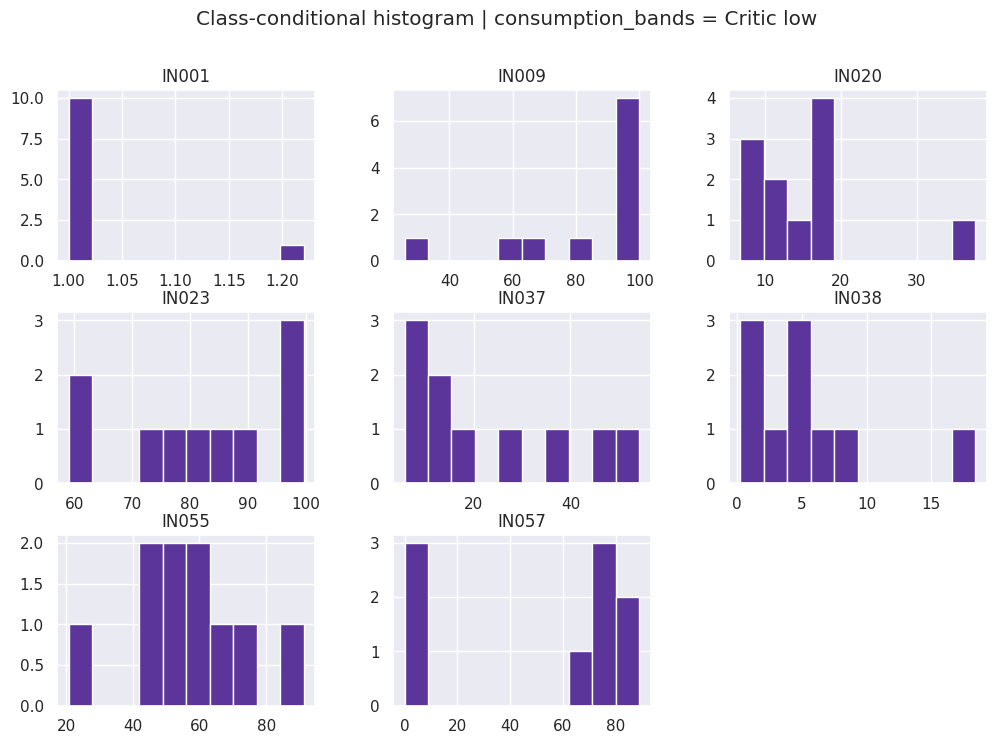

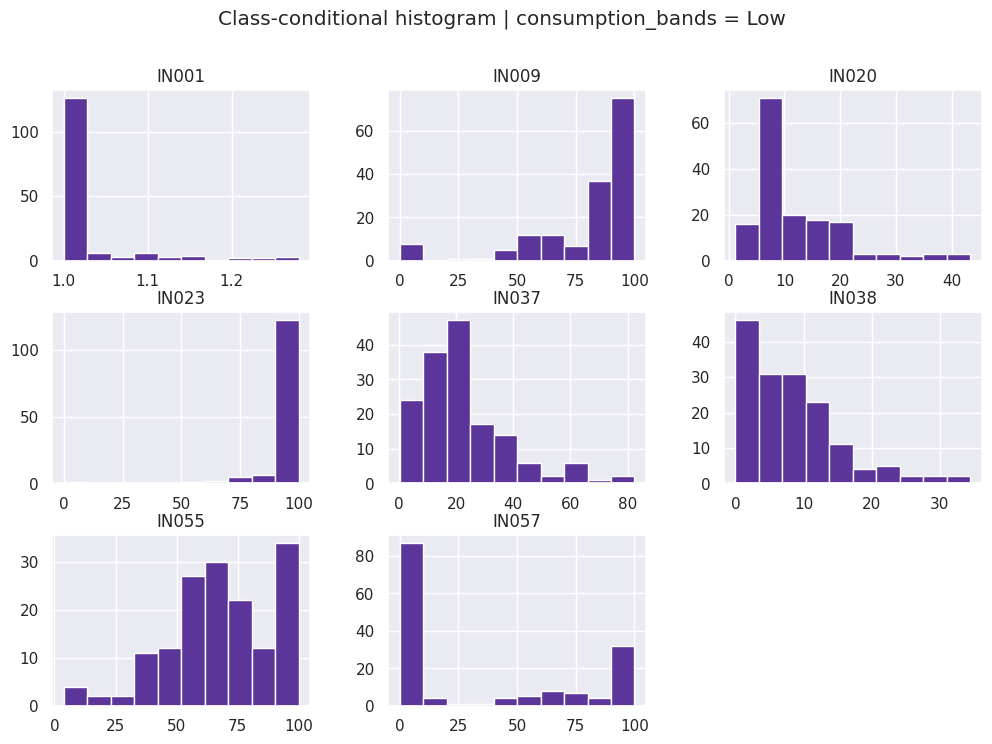

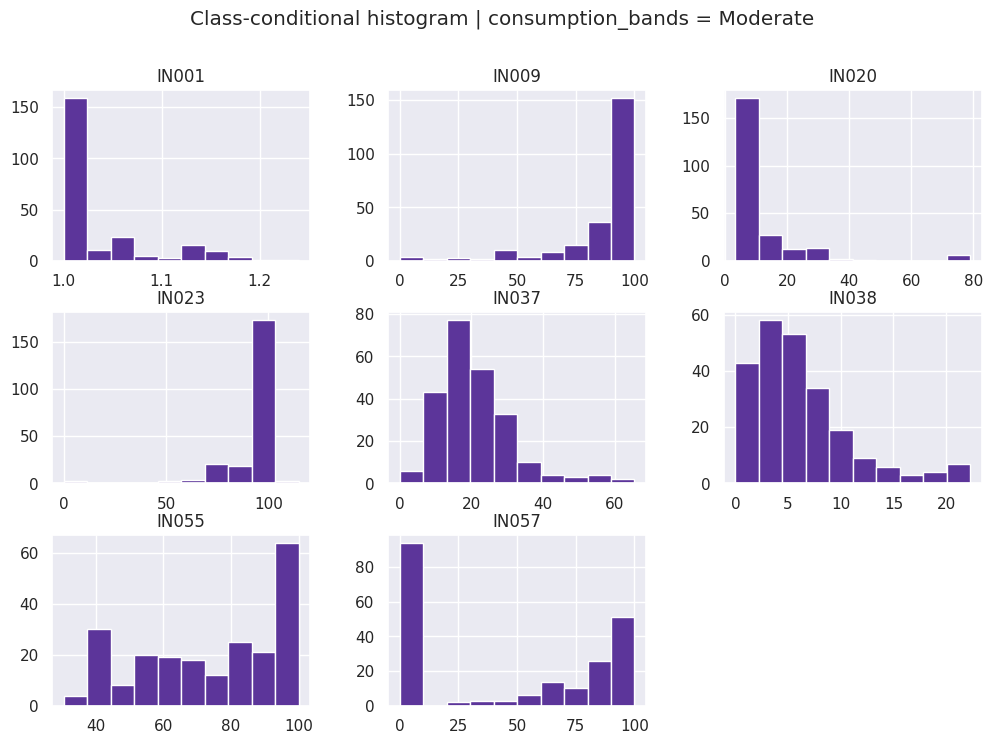

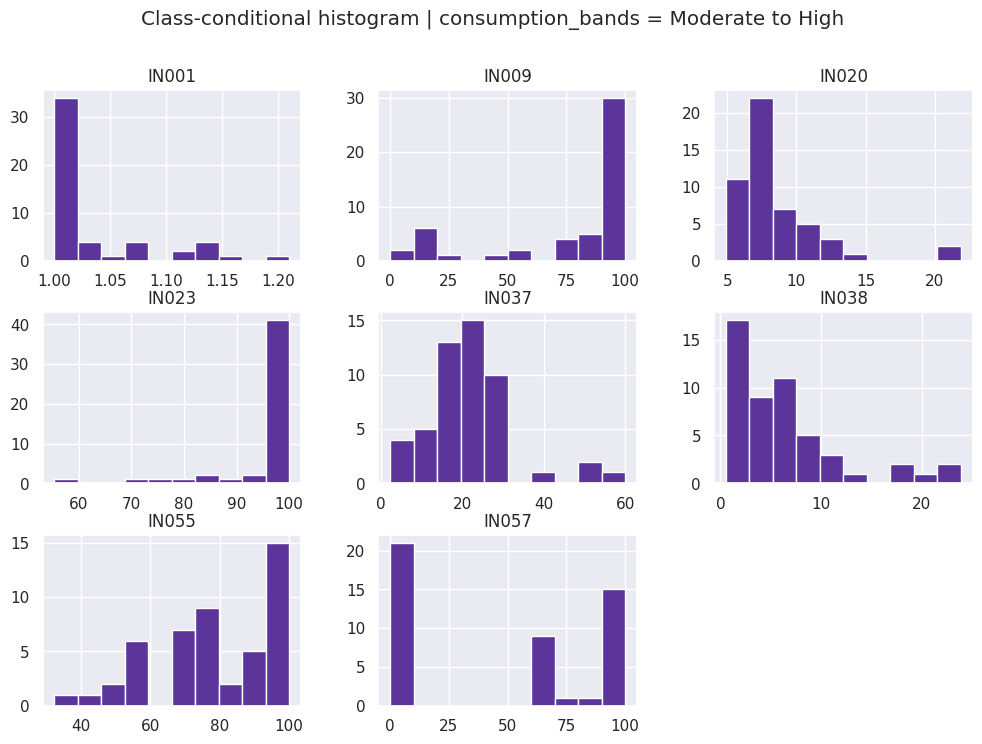

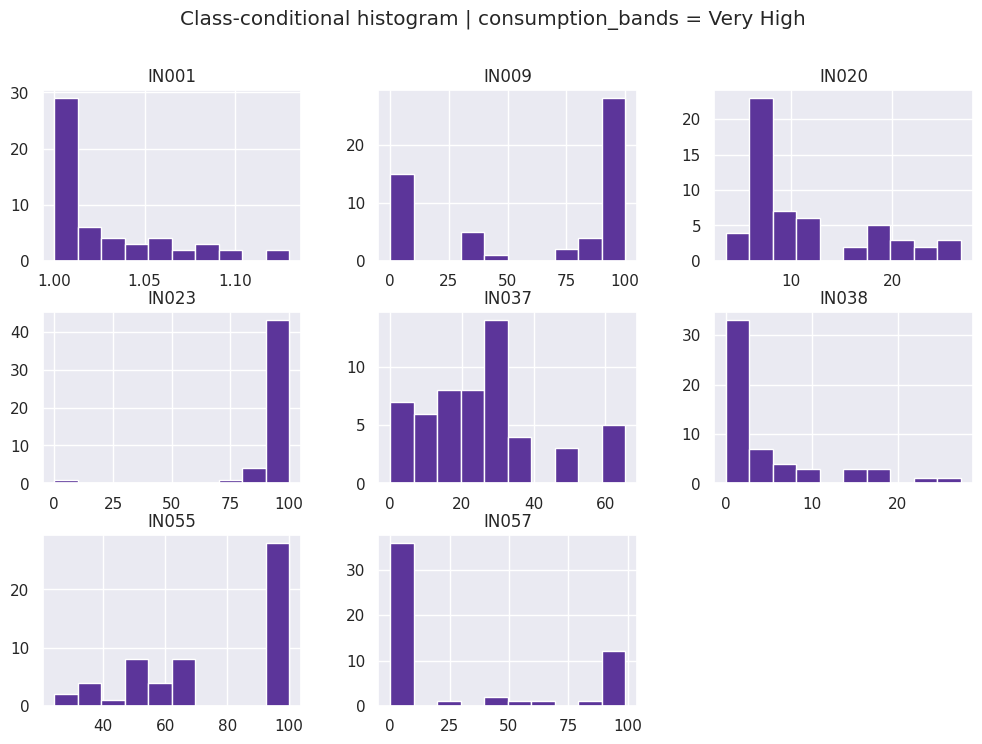

In [32]:
col = "consumption_bands"
for category in bands:
    class_conditional_analysis(df, col, category)

# 4. Perform an unconditional bi-variate analysis of the predictors.

Perform an unconditional bi-variate analysis of the predictors. Specifically, you must plot the scatter plots between all pairs of predictors. For each point (observation), use colours or symbols to indicate the associated class label. Investigate the existence of potential relationships between pairs of predictors and the presence of potential outliers.


In [33]:
from itertools import combinations

In [34]:
feature_combinations = list(combinations(numerical_columns, 2))
feature_combinations

[('IN001', 'IN009'),
 ('IN001', 'IN020'),
 ('IN001', 'IN023'),
 ('IN001', 'IN037'),
 ('IN001', 'IN038'),
 ('IN001', 'IN055'),
 ('IN001', 'IN057'),
 ('IN009', 'IN020'),
 ('IN009', 'IN023'),
 ('IN009', 'IN037'),
 ('IN009', 'IN038'),
 ('IN009', 'IN055'),
 ('IN009', 'IN057'),
 ('IN020', 'IN023'),
 ('IN020', 'IN037'),
 ('IN020', 'IN038'),
 ('IN020', 'IN055'),
 ('IN020', 'IN057'),
 ('IN023', 'IN037'),
 ('IN023', 'IN038'),
 ('IN023', 'IN055'),
 ('IN023', 'IN057'),
 ('IN037', 'IN038'),
 ('IN037', 'IN055'),
 ('IN037', 'IN057'),
 ('IN038', 'IN055'),
 ('IN038', 'IN057'),
 ('IN055', 'IN057')]

In [35]:
len(feature_combinations)

28

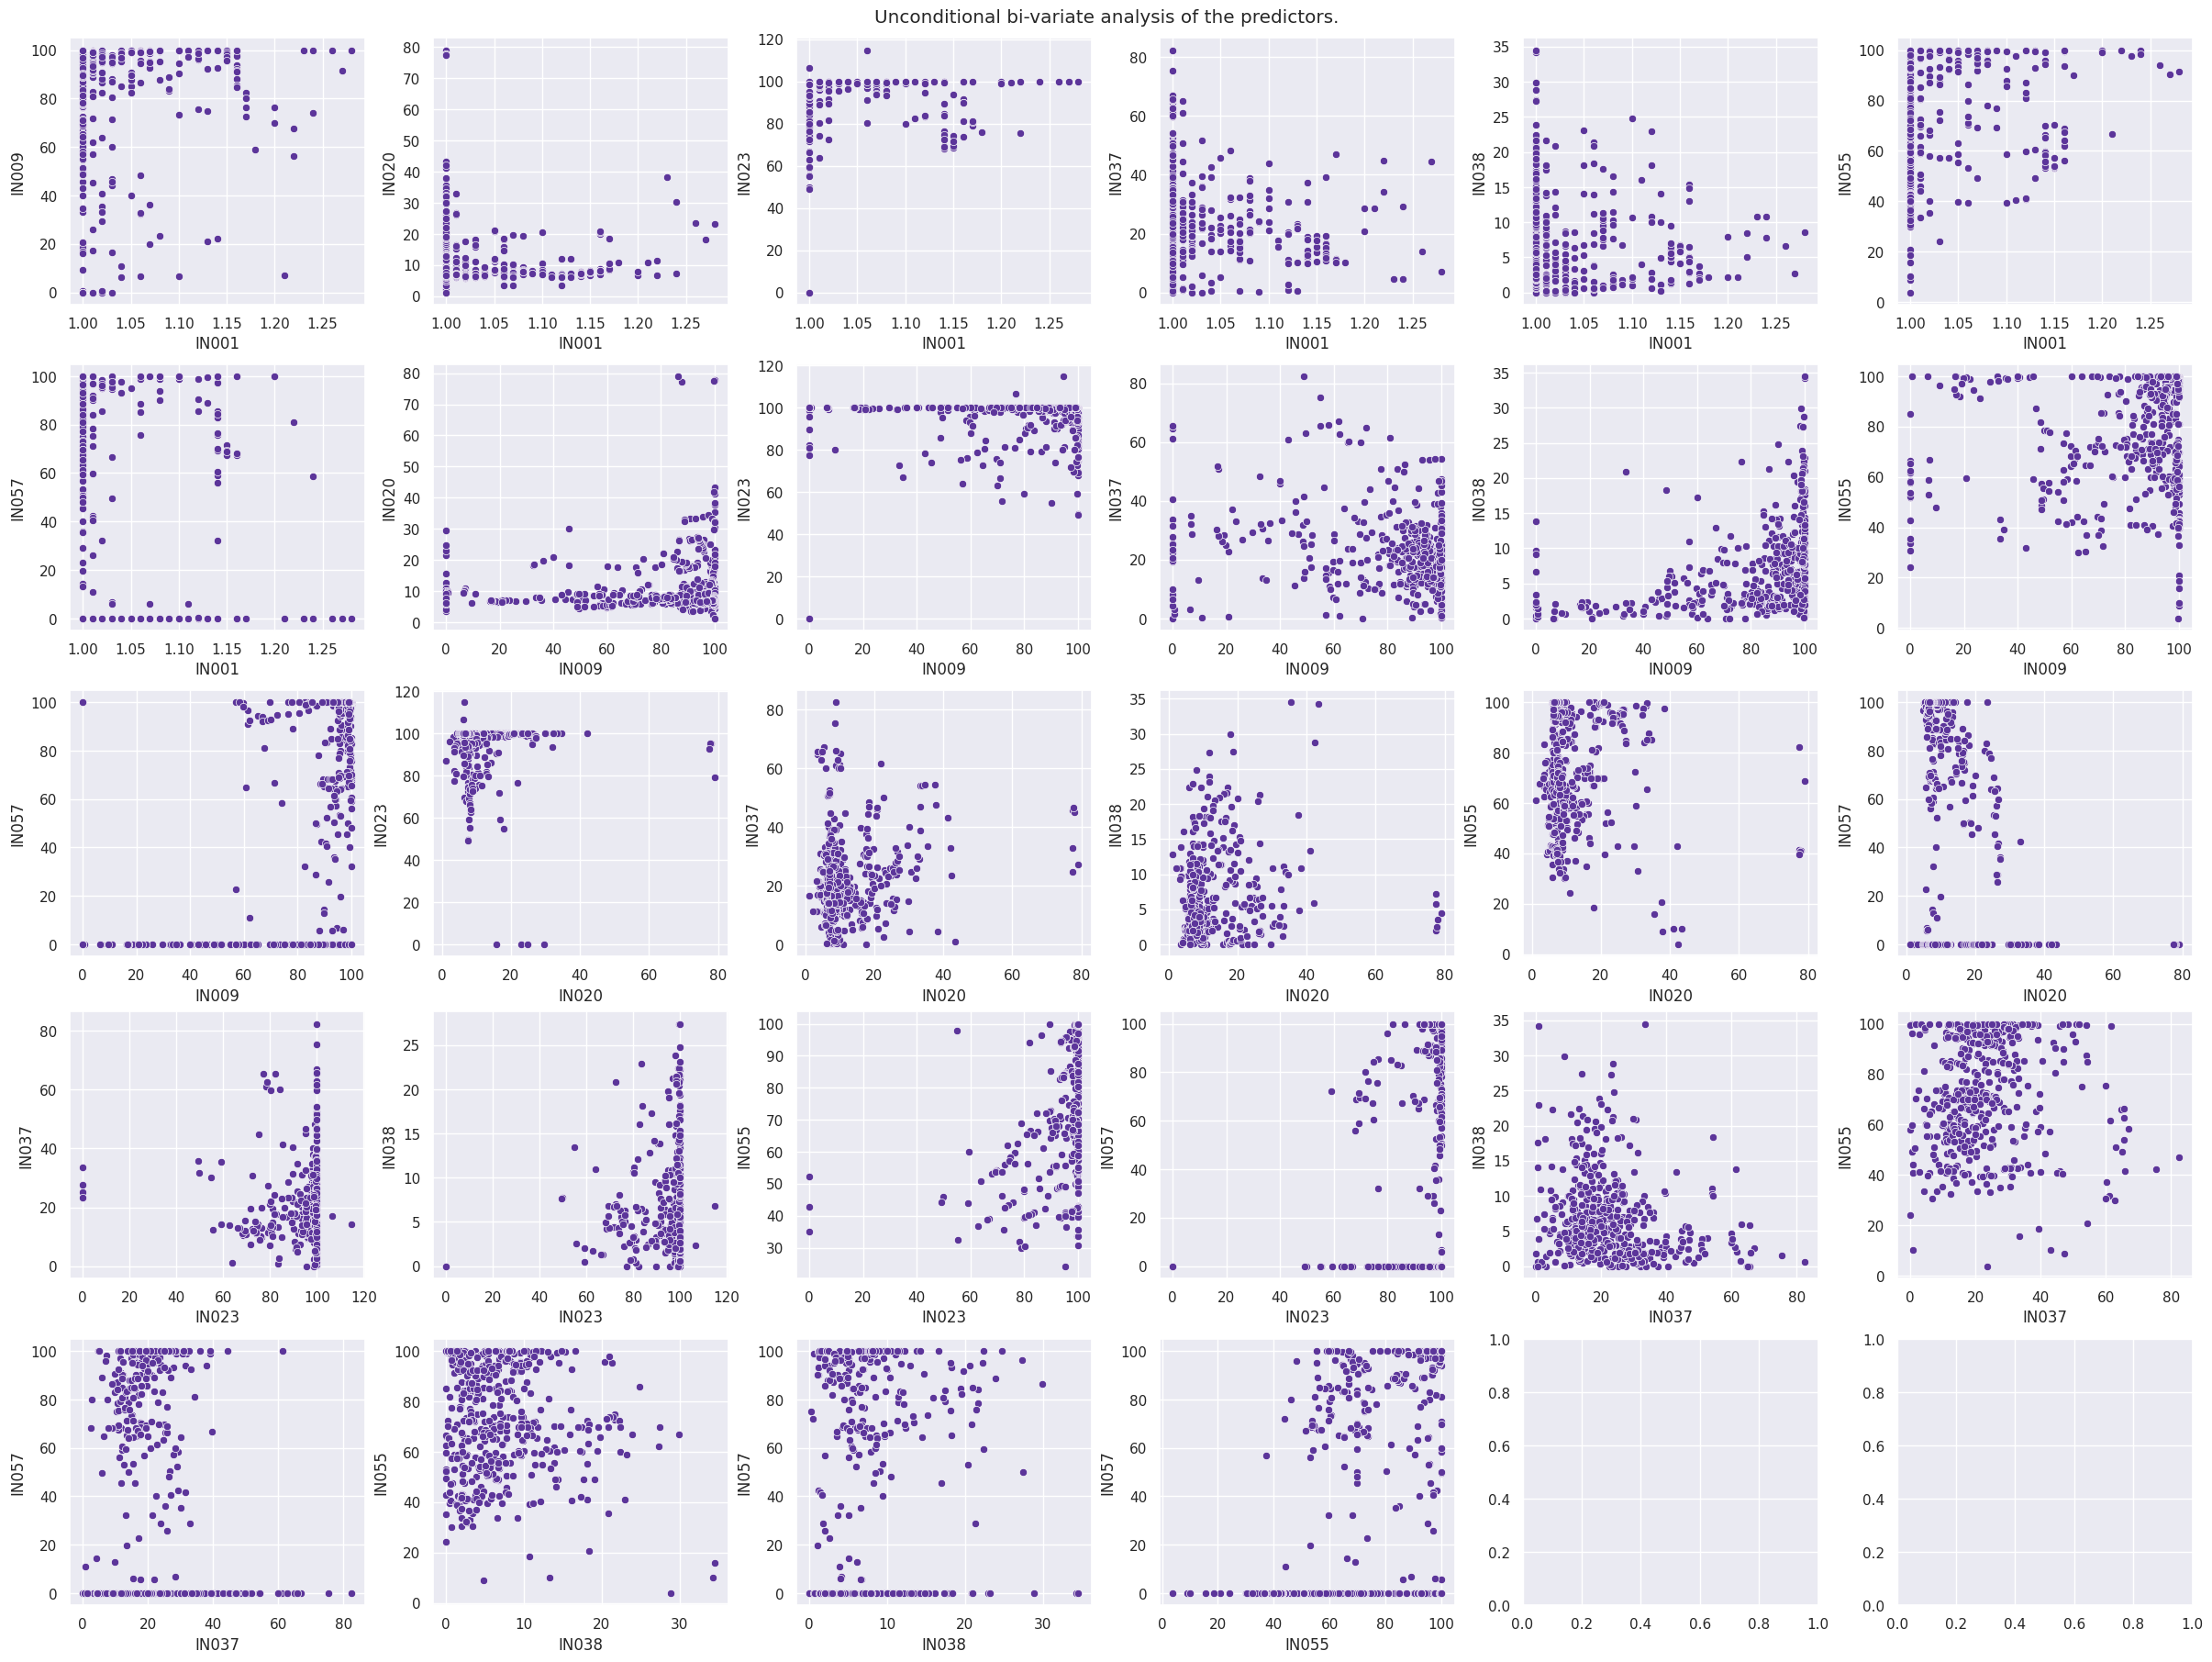

In [36]:
fig, axs = plt.subplots(5, 6, figsize=(24, 18), dpi=100, constrained_layout = True)
# axs = axs.flatten()
# i=0
plt.suptitle("Unconditional bi-variate analysis of the predictors.")
for ax, (col1, col2) in zip(axs.flatten(), feature_combinations):
    sns.scatterplot(
        x=df[col1],
        y=df[col2],
        ax=ax
    )

    # ax.set(title=f"{col}")
    ax.set_xlabel(col1, fontsize=12)
    ax.set_ylabel(col2, fontsize=12)


In [37]:
matrix = df.corr(numeric_only=True)
matrix

,IN001,IN009,IN020,IN023,IN037,IN038,IN055,IN057
IN001,1.000000,0.078193,-0.085855,-0.084691,-0.096226,-0.033393,0.201586,0.085298
IN009,0.078193,1.000000,0.124798,0.194564,-0.212649,0.359759,0.072867,0.379678
IN020,-0.085855,0.124798,1.000000,-0.057235,0.175605,0.130086,-0.060444,-0.155967
IN023,-0.084691,0.194564,-0.057235,1.000000,0.021012,0.123122,0.379308,0.143652
IN037,-0.096226,-0.212649,0.175605,0.021012,1.000000,-0.201290,0.011490,-0.218219
IN038,-0.033393,0.359759,0.130086,0.123122,-0.201290,1.000000,-0.126660,0.221081
IN055,0.201586,0.072867,-0.060444,0.379308,0.011490,-0.126660,1.000000,0.304537
IN057,0.085298,0.379678,-0.155967,0.143652,-0.218219,0.221081,0.304537,1.000000


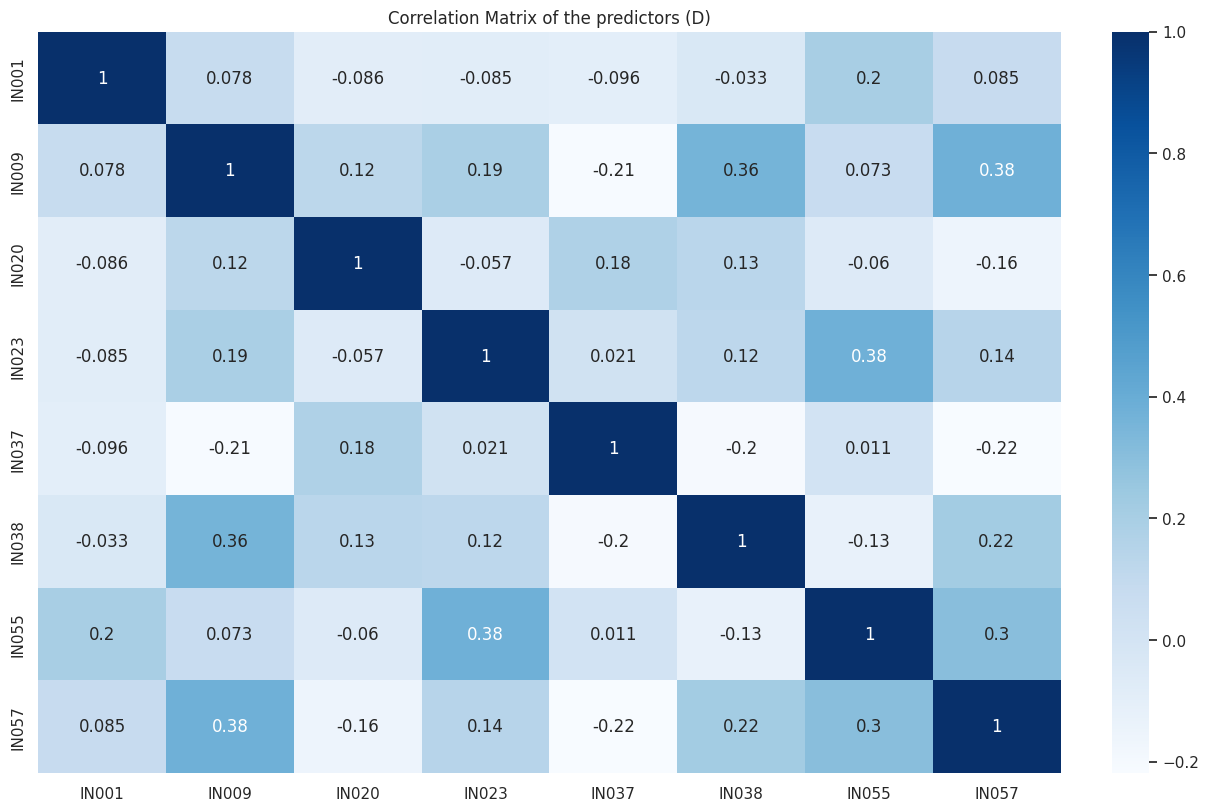

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)

sns.heatmap(matrix, 
            cmap="Blues", 
            annot=True,
            ax=ax)

ax.set(title=f"Correlation Matrix of the predictors (D)")

ax = ax

# 5. Perform an unconditional multi-variate analysis of the predictors.

Perform an unconditional multi-variate analysis of the predictors. Specifically, you must perform a principal components analysis of the predictors, for the sake of visualisation, retain only the first two principal components (those associated with the two largest eigenvalues) and plot the scatter plot of the projected observations. Again, for each projected point (observation) you must use colours or symbols to indicate the associated class label. [Remember to perform the necessary preprocessing of the data]

In [39]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

In [40]:
X = (df[numerical_columns + ["consumption_bands"]].dropna()
     )

labels = X["consumption_bands"]

X.drop(columns=["consumption_bands"], inplace=True)

In [41]:
ohe = make_column_transformer(
  (StandardScaler(), numerical_columns),
  # (OneHotEncoder(handle_unknown = 'ignore', sparse_output=False, dtype=float), categorical_columns),
  remainder='passthrough')

ohe.fit(X)
X_transformed = ohe.transform(X)

In [42]:
dummies_columns = [x.split("__")[1] for x in ohe.get_feature_names_out()]
dummies = pd.DataFrame(X_transformed, columns=dummies_columns)
X = dummies.astype({c: float for c in dummies_columns})

print(X.shape)
X.head()

(422, 8)


,IN001,IN009,IN020,IN023,IN037,IN038,IN055,IN057
0,-0.563576,-1.241541,2.047297,0.418907,1.378935,-0.715113,-0.699146,-0.966671
1,-0.563576,-2.866769,0.148696,0.418907,-0.213527,0.542527,-0.733658,-0.966671
2,-0.563576,-2.866769,-0.082495,0.283465,0.262451,-0.931636,-0.759062,-0.966671
3,-0.191678,-2.866769,-0.058503,0.326277,-1.685081,-0.875701,-0.743724,-0.966671
4,-0.005728,-2.866769,-0.041055,0.060843,-1.685081,-1.200486,-2.366273,-0.966671


In [43]:
pca = PCA(n_components=X.shape[1])
pca_features  = pca.fit_transform(X)


In [44]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = pca.feature_names_in_

# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
feature_names,,,,,,,,
IN001,-0.158075,-0.152917,-0.462268,0.726591,-0.340684,0.196425,0.019208,-0.234488
IN009,-0.511256,0.158526,0.211961,0.148518,0.014240,0.181210,-0.696817,0.357642
IN020,0.037345,-0.087285,0.738550,0.466477,0.005580,-0.372795,0.027595,-0.296918
IN023,-0.308730,-0.456849,0.094575,-0.468641,-0.522774,-0.021150,-0.172509,-0.404854
IN037,0.302101,-0.467910,0.291009,0.048227,0.188296,0.752384,-0.012932,0.032851
IN038,-0.419505,0.330193,0.295171,-0.033078,-0.300726,0.340952,0.628807,0.157115
IN055,-0.302404,-0.638003,-0.064004,0.082948,0.152401,-0.312997,0.274851,0.542025
IN057,-0.508157,-0.011867,-0.105217,-0.049828,0.679184,0.094122,0.111568,-0.495465


In [45]:
# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features[:, :2], 
    columns=['PC1', 'PC2'])
  
# Scale PCS into a DataFrame
pca_df_scaled = pca_df.copy()
 
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
 
pca_df_scaled

,PC1,PC2
0,0.251336,-0.144890
1,0.222689,0.029788
2,0.319256,-0.068117
3,0.236579,0.066666
4,0.318361,0.229934
...,...,...
417,-0.102855,-0.099343
418,-0.119246,-0.144266
419,-0.157541,-0.087538
420,-0.155212,-0.091597


In [46]:
pca_df_scaled["consumption_bands"] = labels

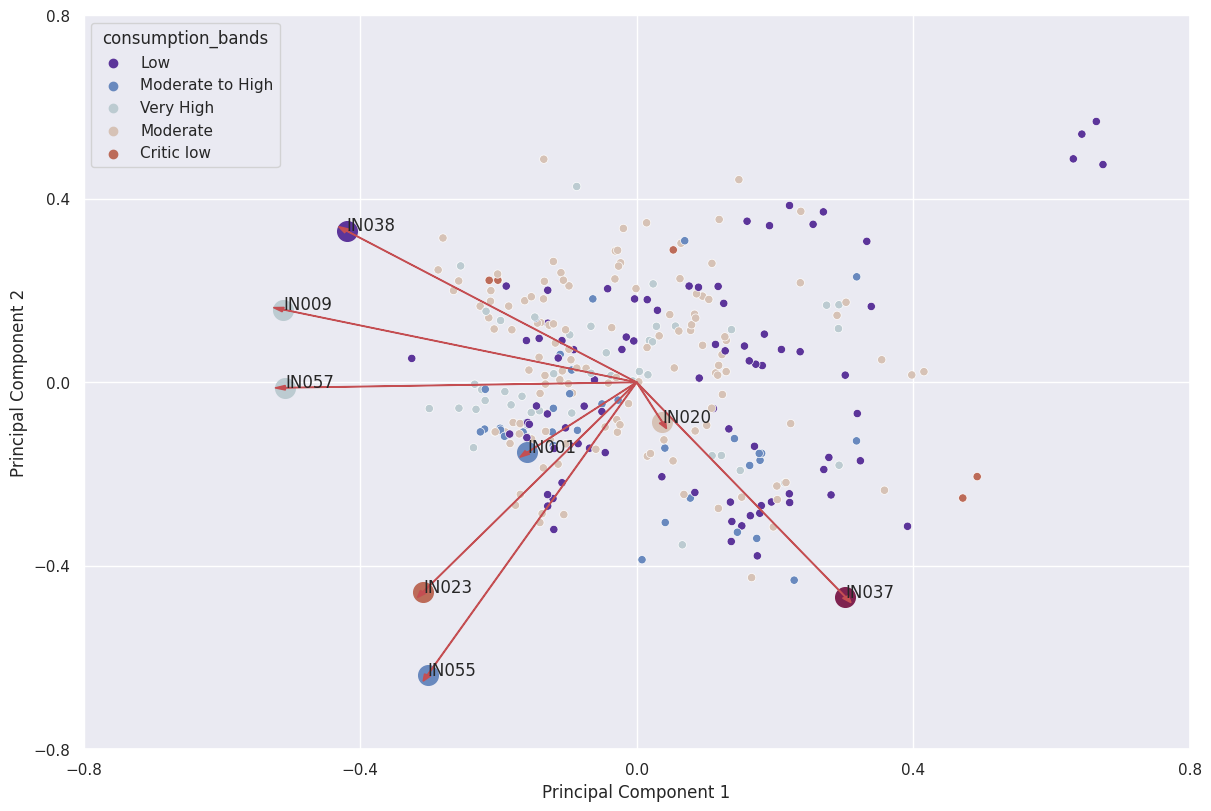

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi=100, constrained_layout = True)

# plt.suptitle("")
sns.scatterplot(
    pca_df_scaled,
    x="PC1",
    y="PC2",
    ax=ax,
    hue="consumption_bands"
)

# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    x = loadings_df.iloc[i,0]
    y = loadings_df.iloc[i,1]
    ax.scatter(x=x, y=y, s=200)
    ax.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    ax.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
 
# ax.set_title('PCA Biplot')
fig = fig

Text(0, 0.5, 'Variância explicada cumulativa')

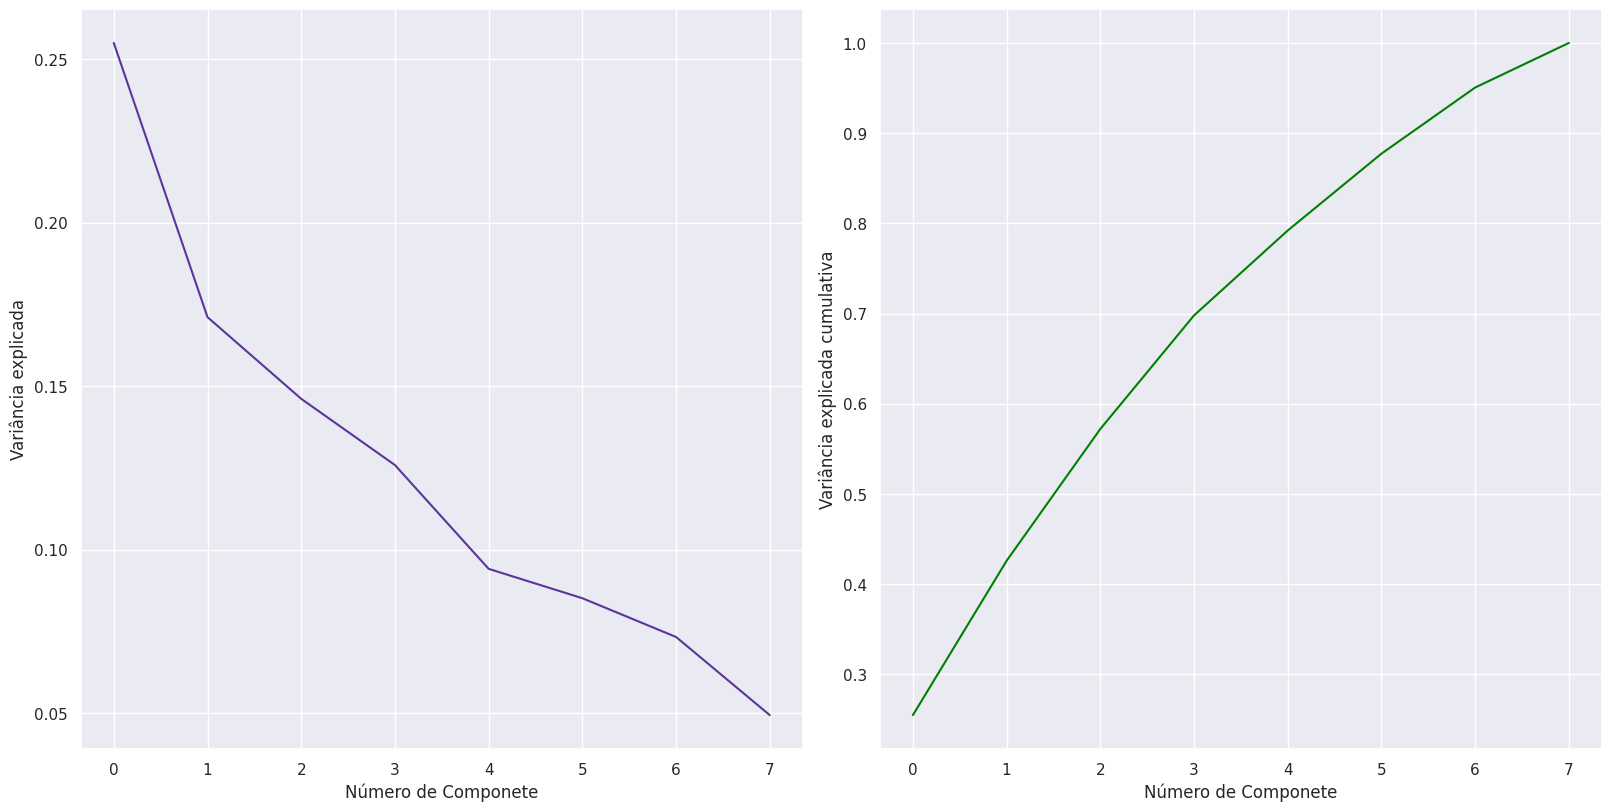

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), dpi=100, constrained_layout = True)

# plt.suptitle("PCA Scree Plot", fontsize=24)

sns.lineplot(pca.explained_variance_ratio_, ax=ax1)
ax1.set_xlabel('Número de Componete')
ax1.set_ylabel('Variância explicada')

sns.lineplot(np.cumsum(pca.explained_variance_ratio_), ax=ax2, color='green')
ax2.set_xlabel('Número de Componete')
ax2.set_ylabel('Variância explicada cumulativa')
